In [1]:
import os
import pandas as pd
from config_file import data_path

In [2]:
df_sessions = pd.read_csv(os.path.join(data_path, 'timestamp_track_event_type.csv'), parse_dates=True)
df_sessions.head()
df_sessions.dtypes

Unnamed: 0    float64
timestamp      object
track_id       object
event_type     object
dtype: object

In [3]:
df_sessions.drop(["Unnamed: 0"], axis=1, inplace=True)
df_sessions.head()

,timestamp,track_id,event_type
0,2020-10-21 20:41:02.953054,7iVl8jW3IzifFiXP0NpknS,play
1,2020-10-21 20:41:52.683054,7iVl8jW3IzifFiXP0NpknS,like
2,2020-10-21 20:43:45.486054,NaN,advertisement
3,2020-10-21 20:44:09.486054,1mr9ZUNWfCUClBDhYbCErx,play
4,2020-10-21 20:44:17.512054,1mr9ZUNWfCUClBDhYbCErx,skip


In [4]:
df_sessions["timestamp"] = pd.to_datetime(df_sessions["timestamp"], format="%Y-%m-%d %H:%M:%S.%f", errors='coerce')
df_sessions.head()

,timestamp,track_id,event_type
0,2020-10-21 20:41:02.953054,7iVl8jW3IzifFiXP0NpknS,play
1,2020-10-21 20:41:52.683054,7iVl8jW3IzifFiXP0NpknS,like
2,2020-10-21 20:43:45.486054,NaN,advertisement
3,2020-10-21 20:44:09.486054,1mr9ZUNWfCUClBDhYbCErx,play
4,2020-10-21 20:44:17.512054,1mr9ZUNWfCUClBDhYbCErx,skip


In [5]:
df_sessions["next_event"] =  (
    df_sessions["timestamp"].shift(-1) - df_sessions["timestamp"]
).dt.total_seconds()
df_sessions.head()

,timestamp,track_id,event_type,next_event
0,2020-10-21 20:41:02.953054,7iVl8jW3IzifFiXP0NpknS,play,49.730
1,2020-10-21 20:41:52.683054,7iVl8jW3IzifFiXP0NpknS,like,112.803
2,2020-10-21 20:43:45.486054,NaN,advertisement,24.000
3,2020-10-21 20:44:09.486054,1mr9ZUNWfCUClBDhYbCErx,play,8.026
4,2020-10-21 20:44:17.512054,1mr9ZUNWfCUClBDhYbCErx,skip,0.000


In [6]:
df_sessions = df_sessions[df_sessions["event_type"] == "play"]
df_sessions.head()

,timestamp,track_id,event_type,next_event
0,2020-10-21 20:41:02.953054,7iVl8jW3IzifFiXP0NpknS,play,49.730
3,2020-10-21 20:44:09.486054,1mr9ZUNWfCUClBDhYbCErx,play,8.026
5,2020-10-21 20:44:17.512054,5ITa72IsNdohe9gu2gDQQC,play,224.533
6,2020-10-21 20:48:02.045054,2Fkgr7LZTAjakkceB7PwN5,play,156.474
8,2020-10-21 20:50:38.519054,6oPKcllvFYlDveYlyBuYXs,play,156.547


In [7]:
df_sessions.drop(["event_type"], axis=1, inplace=True)
df_sessions.head()

,timestamp,track_id,next_event
0,2020-10-21 20:41:02.953054,7iVl8jW3IzifFiXP0NpknS,49.730
3,2020-10-21 20:44:09.486054,1mr9ZUNWfCUClBDhYbCErx,8.026
5,2020-10-21 20:44:17.512054,5ITa72IsNdohe9gu2gDQQC,224.533
6,2020-10-21 20:48:02.045054,2Fkgr7LZTAjakkceB7PwN5,156.474
8,2020-10-21 20:50:38.519054,6oPKcllvFYlDveYlyBuYXs,156.547


In [8]:
df_artist_track = pd.read_csv(os.path.join(data_path, 'track_artist_duration.csv'))
df_artist_track.head()

,id,id_artist,duration_ms
0,6C0WWu7RYKbAgWUI3YC0sT,7u710e44HW3K7A5eTnRqHC,249573
1,4q7EBRq8ncztC2PRmEC7Fy,3sFhA6G1N0gG1pszb6kk1m,254733
2,7cNyONpVADZVrW9xe3qq4z,7IAXZaLTb6nkJr8RmVPn5y,279347
3,1bKRTzTFz7wHMxpgZSuPR1,5bOsFzuJ6QZMr86ezC4oXY,193707
4,56OEjuyZ3AROnv4aR1XqhD,6zJ7WZkyTNmB1bFdmHH2k9,182120


In [9]:
df_artist_track["duration_ms"] = df_artist_track["duration_ms"] / 1000
df_artist_track.rename(columns={"duration_ms": "duration_s", "id": "track_id"}, inplace=True)
df_artist_track.head()

,track_id,id_artist,duration_s
0,6C0WWu7RYKbAgWUI3YC0sT,7u710e44HW3K7A5eTnRqHC,249.573
1,4q7EBRq8ncztC2PRmEC7Fy,3sFhA6G1N0gG1pszb6kk1m,254.733
2,7cNyONpVADZVrW9xe3qq4z,7IAXZaLTb6nkJr8RmVPn5y,279.347
3,1bKRTzTFz7wHMxpgZSuPR1,5bOsFzuJ6QZMr86ezC4oXY,193.707
4,56OEjuyZ3AROnv4aR1XqhD,6zJ7WZkyTNmB1bFdmHH2k9,182.120


In [10]:
df_sessions = df_sessions.merge(df_artist_track, on="track_id", how="left")
df_sessions.head()

,timestamp,track_id,next_event,id_artist,duration_s
0,2020-10-21 20:41:02.953054,7iVl8jW3IzifFiXP0NpknS,49.730,1SQRv42e4PjEYfPhS0Tk9E,162.533
1,2020-10-21 20:44:09.486054,1mr9ZUNWfCUClBDhYbCErx,8.026,34jw2BbxjoYalTp8cJFCPv,220.415
2,2020-10-21 20:44:17.512054,5ITa72IsNdohe9gu2gDQQC,224.533,44NX2ffIYHr6D4n7RaZF7A,224.533
3,2020-10-21 20:48:02.045054,2Fkgr7LZTAjakkceB7PwN5,156.474,1Yox196W7bzVNZI7RBaPnf,374.827
4,2020-10-21 20:50:38.519054,6oPKcllvFYlDveYlyBuYXs,156.547,1eClJfHLoDI4rZe5HxzBFv,156.547


In [11]:
df_sessions.drop(["track_id"], axis=1, inplace=True)
df_sessions.head()

,timestamp,next_event,id_artist,duration_s
0,2020-10-21 20:41:02.953054,49.730,1SQRv42e4PjEYfPhS0Tk9E,162.533
1,2020-10-21 20:44:09.486054,8.026,34jw2BbxjoYalTp8cJFCPv,220.415
2,2020-10-21 20:44:17.512054,224.533,44NX2ffIYHr6D4n7RaZF7A,224.533
3,2020-10-21 20:48:02.045054,156.474,1Yox196W7bzVNZI7RBaPnf,374.827
4,2020-10-21 20:50:38.519054,156.547,1eClJfHLoDI4rZe5HxzBFv,156.547


In [12]:
df_sessions["song_duration"] = df_sessions[['duration_s', 'next_event']].min(axis=1)
df_sessions.head()

,timestamp,next_event,id_artist,duration_s,song_duration
0,2020-10-21 20:41:02.953054,49.730,1SQRv42e4PjEYfPhS0Tk9E,162.533,49.730
1,2020-10-21 20:44:09.486054,8.026,34jw2BbxjoYalTp8cJFCPv,220.415,8.026
2,2020-10-21 20:44:17.512054,224.533,44NX2ffIYHr6D4n7RaZF7A,224.533,224.533
3,2020-10-21 20:48:02.045054,156.474,1Yox196W7bzVNZI7RBaPnf,374.827,156.474
4,2020-10-21 20:50:38.519054,156.547,1eClJfHLoDI4rZe5HxzBFv,156.547,156.547


In [13]:
df_sessions[df_sessions["next_event"] >= 0].count(), df_sessions[df_sessions["next_event"] < 0].count() 

(timestamp        13974795
 next_event       13974795
 id_artist        13974795
 duration_s       13974795
 song_duration    13974795
 dtype: int64,
 timestamp        31625
 next_event       31625
 id_artist        31625
 duration_s       31625
 song_duration    31625
 dtype: int64)

In [14]:
df_sessions_filtered = df_sessions[df_sessions["next_event"] >= 0]
df_sessions_filtered.head()

,timestamp,next_event,id_artist,duration_s,song_duration
0,2020-10-21 20:41:02.953054,49.730,1SQRv42e4PjEYfPhS0Tk9E,162.533,49.730
1,2020-10-21 20:44:09.486054,8.026,34jw2BbxjoYalTp8cJFCPv,220.415,8.026
2,2020-10-21 20:44:17.512054,224.533,44NX2ffIYHr6D4n7RaZF7A,224.533,224.533
3,2020-10-21 20:48:02.045054,156.474,1Yox196W7bzVNZI7RBaPnf,374.827,156.474
4,2020-10-21 20:50:38.519054,156.547,1eClJfHLoDI4rZe5HxzBFv,156.547,156.547


In [15]:
from datetime import datetime, timedelta
DAY_OF_PREDICTION = datetime(day=30, month=10, year=2023)
PERIOD_IN_DAYS = 30

start_date = DAY_OF_PREDICTION - timedelta(days=PERIOD_IN_DAYS)
df_sessions_filtered = df_sessions_filtered[df_sessions_filtered["timestamp"] >= start_date]
df_sessions_filtered.head()

,timestamp,next_event,id_artist,duration_s,song_duration
38992,2023-10-01 22:24:53.588136,115.956,2ye2Wgw4gimLv2eAKyk1NB,396.987,115.956
38993,2023-10-01 22:28:31.981136,207.916,7z5WFjZAIYejWy0NI5lv4T,213.387,207.916
38994,2023-10-01 22:32:05.368136,58.730,2UazAtjfzqBF0Nho2awK4z,332.627,58.730
38995,2023-10-01 22:33:09.163136,172.160,1YqGsKpdixxSVgpfaL2AEQ,172.160,172.160
38996,2023-10-01 22:36:01.323136,170.424,1dfeR4HaWDbWqFHLkxsg1d,203.280,170.424


In [16]:
df_sessions_filtered.shape

(1273616, 5)

In [17]:
avg_song_duration = df_sessions_filtered.groupby("id_artist")["song_duration"].mean()

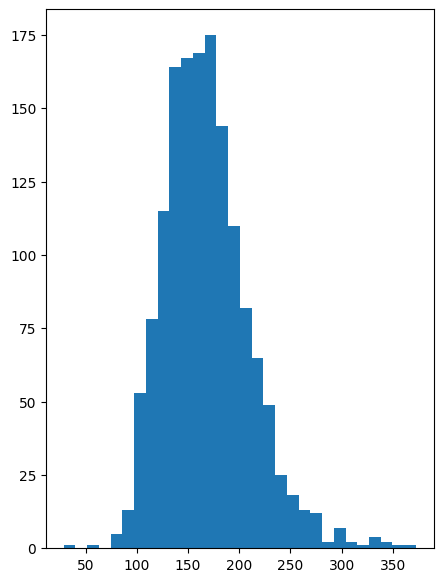

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,7))
plt.hist(avg_song_duration, bins=30)
plt.show()
